# Reconstructing maps of trend per grid cell

In [12]:
# specify the file description that was used to save all the data
fnm_root = "tx5x-era5"

In [24]:
import xarray as xr, numpy as np, pandas as pd, glob, cartopy

import warnings; warnings.filterwarnings("ignore", category = FutureWarning) # otherwise there will be a LOT of warnings

import matplotlib, matplotlib.pyplot as plt

# function to reshape dataframe into map
def vec2map(x, mask):
    
    # reconstruct vector into map
    # create an empty map with NA in same cells as masks
    arr = mask.where(np.isnan(mask), 0)
    
    # get coordinates of non-empty cells
    px = np.argwhere(~np.isnan(mask.values))
    
    # Transfer vector values into non-empty cells in array
    if len(px) == len(x):
        for i in list(range(len(px))): arr[px[i,0], px[i,1]] = x[i]
        return arr
    else:
        print(str(len(x))+" values, but "+str(len(px))+" cells")
        return

## Reshape dataframe into maps

Don't change anything in the cell below

In [19]:
# load target map showing original shape of data
tmplt = xr.open_dataset("map-tmplt_"+fnm_root+".nc")
tmplt = tmplt[list(tmplt.data_vars)[0]]

# load all the flattened results and compile into a single dataframe
df = pd.concat([pd.read_csv(fnm, index_col = 0) for fnm in sorted(glob.glob("flattened-res/"+fnm_root+"*.csv"))], axis = 0)

# reconstruct map
res = xr.merge([vec2map(df.loc[r], tmplt).rename(r) for r in df.index])

# replace infinite values with very high value
res["PR"] = res.PR.where(np.isfinite(res.PR), 1000).where(~np.isnan(res.PR))

# save
res.to_netcdf("gridded-trend_"+fnm_root+".nc")

# Maps of trend per grid cell

Try to customise the maps to your event:
- change the labels
- change the colourmap (https://matplotlib.org/stable/users/explain/colors/colormaps.html)
  - For temperatures, 'YlOrRd' is a good choice, and for temperature anomalies/changes, 'RdBu_r'
  - For precipitation, 'YlGnBu' is a good choice, and for rainfall anomalies/changes, 'BrBG'
- set the colour scale (using vmax and vmin) to highlight the worst-affected areas

In [20]:
# load the reconstructed maps - this has one variable for each of the outputs from the R trend fitting
res = xr.open_dataset("gridded-trend_"+fnm_root+".nc")

## Change in intensity (for temperature etc)

/home/cb2714/conda/envs/wwa/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


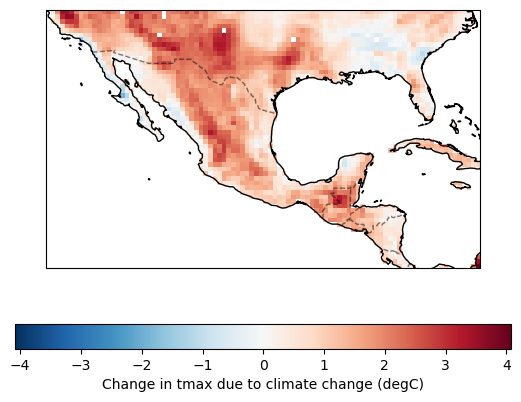

In [40]:
res.dI_abs.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                cmap = "RdBu_r",
                cbar_kwargs = {"location" : "bottom",
                               "label" : "Change in tmax due to climate change (degC)"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")

## Change in relative intensity (for precipitation)

/home/cb2714/conda/envs/wwa/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


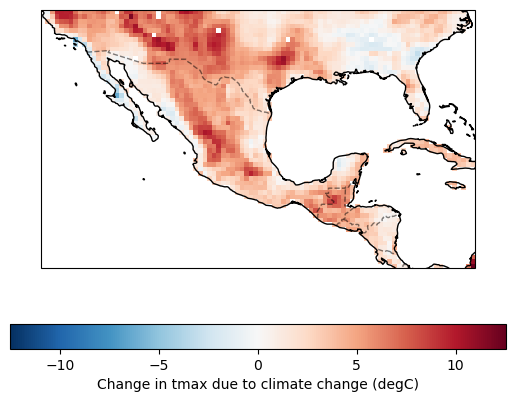

In [41]:
res.dI_rel.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                cmap = "RdBu_r",
                cbar_kwargs = {"location" : "bottom",
                               "label" : "% change in tmax due to climate change (degC)"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")

In [42]:
res

<xarray.Dataset> Size: 232kB
Dimensions:          (lat: 56, lon: 94)
Coordinates:
  * lon              (lon) float32 376B 238.1 238.6 239.1 ... 283.6 284.1 284.6
  * lat              (lat) float32 224B 36.88 36.38 35.88 ... 10.38 9.875 9.375
Data variables:
    mu0              (lat, lon) float32 21kB ...
    sigma0           (lat, lon) float32 21kB ...
    alpha_gmst       (lat, lon) float32 21kB ...
    shape            (lat, lon) float32 21kB ...
    disp             (lat, lon) float32 21kB ...
    event_magnitude  (lat, lon) float32 21kB ...
    return_period    (lat, lon) float32 21kB ...
    PR               (lat, lon) float32 21kB ...
    dI_abs           (lat, lon) float32 21kB ...
    dI_rel           (lat, lon) float32 21kB ...
    aic              (lat, lon) float32 21kB ...

/home/cb2714/conda/envs/wwa/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


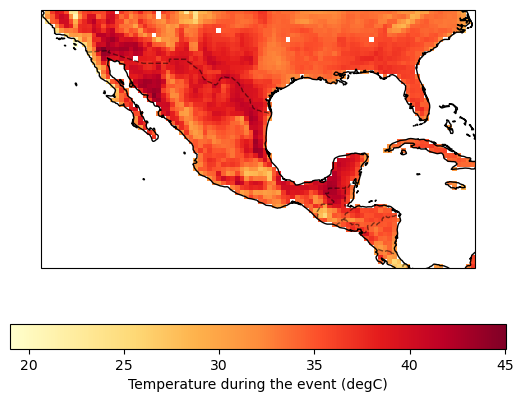

In [44]:
res.event_magnitude.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                         cmap = "YlOrRd",
                         cbar_kwargs = {"location" : "bottom",
                                        "label" : "Temperature during the event (degC)"}) 
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")